In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
labels=pd.read_csv("../input/stage2_newtrain.csv", usecols=['ID','Class'],index_col=0)['Class']

In [3]:
labels.index=labels.index.map(lambda u: 'tr'+str(u))

In [4]:
labels=labels.to_dict()

In [5]:
len(labels)

3689

In [6]:
set(labels.values())

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
lst=[]
with open("../input/stage2_graphlpa.txt") as f:
    for line in f:
        lst.append(line.strip().split(","))

In [8]:
len(lst)

489

In [9]:
np.sum([sum(len(u)) for u in lst])

3807

In [11]:
def f(ids):
    classes=np.array([np.nan if i not in labels else labels[i] for i in ids])
    if np.isnan(classes).all() or len(classes)<2:
        return {i: dict(zip(range(1,10),[np.nan]*9))}
    print classes        
    prior_vc=pd.Series(np.ones(9),index=range(1,10))*1
    vc = pd.Series(classes).value_counts().astype(np.int)
    prior_vc.loc[vc.index]=prior_vc.loc[vc.index]+vc
    #print vc,prior_vc
    probs=prior_vc/prior_vc.sum()
    return {i: probs.to_dict() for i in ids}

In [12]:
f(lst[1])

[ nan   6.   6.   6.   6.   6.   6.   6.   6.]


{'te759': {1: 0.058823529411764705,
  2: 0.058823529411764705,
  3: 0.058823529411764705,
  4: 0.058823529411764705,
  5: 0.058823529411764705,
  6: 0.52941176470588236,
  7: 0.058823529411764705,
  8: 0.058823529411764705,
  9: 0.058823529411764705},
 'tr14077': {1: 0.058823529411764705,
  2: 0.058823529411764705,
  3: 0.058823529411764705,
  4: 0.058823529411764705,
  5: 0.058823529411764705,
  6: 0.52941176470588236,
  7: 0.058823529411764705,
  8: 0.058823529411764705,
  9: 0.058823529411764705},
 'tr2807': {1: 0.058823529411764705,
  2: 0.058823529411764705,
  3: 0.058823529411764705,
  4: 0.058823529411764705,
  5: 0.058823529411764705,
  6: 0.52941176470588236,
  7: 0.058823529411764705,
  8: 0.058823529411764705,
  9: 0.058823529411764705},
 'tr2815': {1: 0.058823529411764705,
  2: 0.058823529411764705,
  3: 0.058823529411764705,
  4: 0.058823529411764705,
  5: 0.058823529411764705,
  6: 0.52941176470588236,
  7: 0.058823529411764705,
  8: 0.058823529411764705,
  9: 0.058823529

In [13]:
feats_dict={}

In [14]:
for a in lst:
    feats_dict.update(f(a))

[ nan   6.   6.   6.   6.   6.   6.   6.   6.]
[  7.   7.   7.   7.  nan   7.   7.]
[  4.  nan   4.   4.  nan   2.   4.  nan   7.]
[  7.   7.   7.   2.   2.   7.  nan   7.   7.   7.   7.  nan   3.   2.   7.
   7.   7.  nan   2.   7.   5.   7.  nan   2.   2.   7.   7.   7.   7.   2.
   7.   7.   7.   7.   5.   7.  nan   7.  nan   7.   2.   7.]
[  4.   4.  nan   4.   4.  nan]
[  1.  nan]
[  7.  nan   7.]
[2 7 2]
[  4.   4.   1.  nan   1.   1.   4.  nan  nan   1.]
[  2.   1.  nan   1.   1.   1.   1.   1.   1.   1.  nan]
[  5.  nan   6.   1.   1.   1.   2.]
[7 7 2 2 2 7 7 7 7]
[7 7]
[4 4 4 4 4 4 4 4 4]
[  7.   7.   2.   7.   7.   7.   7.   7.   2.   2.   1.  nan   4.   2.   1.
   7.   2.   1.   6.   7.   1.]
[  5.   5.  nan   5.]
[4 4 4 4 1 1 4 1 2 5 1]
[7 7]
[7 7 3 3]
[6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6]
[1 1]
[ nan   7.   1.   1.   7.]
[  6.   6.   6.   6.   4.   6.   6.   6.   6.   6.   3.   6.   6.   6.   6.
   6.   6.   6.   6.   6.   6.  nan   3.   6.   6.   4.   6

In [15]:
feats=pd.DataFrame(feats_dict).T

In [16]:
feats.columns=['lpaprob_'+str(i) for i in feats.columns]

In [17]:
feats_classes=feats.index.map(lambda i: np.nan if i not in labels else labels[i])

In [18]:
feats.head()

lpaprob_1  lpaprob_2  lpaprob_3  lpaprob_4  lpaprob_5  lpaprob_6  \
te10    0.028571   0.057143   0.142857   0.028571   0.114286   0.028571   
te100        NaN        NaN        NaN        NaN        NaN        NaN   
te102   0.026316   0.052632   0.026316   0.026316   0.026316   0.026316   
te104   0.402778   0.277778   0.027778   0.083333   0.041667   0.013889   
te105   0.026316   0.052632   0.026316   0.026316   0.026316   0.026316   

       lpaprob_7  lpaprob_8  lpaprob_9  
te10    0.542857   0.028571   0.028571  
te100        NaN        NaN        NaN  
te102   0.763158   0.026316   0.026316  
te104   0.069444   0.055556   0.027778  
te105   0.763158   0.026316   0.026316

In [19]:
feats.shape,feats.dropna().shape

((3806, 9), (3637, 9))

In [20]:
testidx=feats.index[feats.index.map(lambda u: u.startswith('te'))]
len(testidx)

647

In [21]:
train=feats[~feats.index.isin(testidx)]
train.index=train.index.map(lambda u: int(u[2:]))
train=train.sort_index()
train.index.name="ID"
train.shape,train.dropna().shape

((3159, 9), (3002, 9))

In [22]:
train.head()

lpaprob_1  lpaprob_2  lpaprob_3  lpaprob_4  lpaprob_5  lpaprob_6  \
ID                                                                     
1    0.037037   0.111111   0.037037   0.444444   0.148148   0.111111   
2    0.037037   0.111111   0.037037   0.444444   0.148148   0.111111   
3    0.071429   0.071429   0.142857   0.357143   0.071429   0.071429   
4    0.037037   0.111111   0.037037   0.444444   0.148148   0.111111   
5    0.037037   0.111111   0.037037   0.444444   0.148148   0.111111   

    lpaprob_7  lpaprob_8  lpaprob_9  
ID                                   
1    0.037037   0.037037   0.037037  
2    0.037037   0.037037   0.037037  
3    0.071429   0.071429   0.071429  
4    0.037037   0.037037   0.037037  
5    0.037037   0.037037   0.037037

In [23]:
train.tail()

lpaprob_1  lpaprob_2  lpaprob_3  lpaprob_4  lpaprob_5  lpaprob_6  \
ID                                                                        
15581   0.055556   0.111111   0.055556   0.055556   0.055556   0.333333   
15600   0.095238   0.095238   0.047619   0.476190   0.047619   0.095238   
15609   0.208333   0.041667   0.041667   0.458333   0.041667   0.083333   
15626   0.055556   0.111111   0.055556   0.055556   0.055556   0.333333   
15650   0.277778   0.055556   0.055556   0.333333   0.055556   0.055556   

       lpaprob_7  lpaprob_8  lpaprob_9  
ID                                      
15581   0.222222   0.055556   0.055556  
15600   0.047619   0.047619   0.047619  
15609   0.041667   0.041667   0.041667  
15626   0.222222   0.055556   0.055556  
15650   0.055556   0.055556   0.055556

In [24]:
train.to_csv("../input/stage2_newtrain_lpaprob.csv")

In [25]:
test=feats[feats.index.isin(testidx)]
test.index=test.index.map(lambda u: int(u[2:]))
test=test.sort_index()
test.index.name='ID'
test.shape,test.dropna().shape

((647, 9), (635, 9))

In [26]:
test.head()

lpaprob_1  lpaprob_2  lpaprob_3  lpaprob_4  lpaprob_5  lpaprob_6  \
ID                                                                     
3    0.090909   0.090909   0.090909   0.090909   0.090909   0.090909   
5    0.076923   0.153846   0.076923   0.076923   0.076923   0.076923   
7    0.023810   0.317460   0.007937   0.031746   0.023810   0.007937   
9    0.166667   0.083333   0.083333   0.250000   0.083333   0.083333   
10   0.028571   0.057143   0.142857   0.028571   0.114286   0.028571   

    lpaprob_7  lpaprob_8  lpaprob_9  
ID                                   
3    0.272727   0.090909   0.090909  
5    0.307692   0.076923   0.076923  
7    0.571429   0.007937   0.007937  
9    0.083333   0.083333   0.083333  
10   0.542857   0.028571   0.028571

In [27]:
test.to_csv("../input/stage2_newtest_lpaprob.csv")

1 lpaprob_1 515 2487


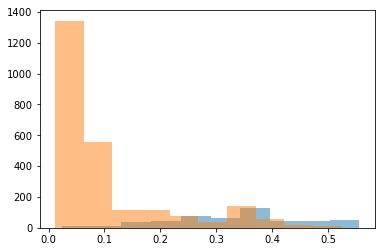

2 lpaprob_2 379 2623


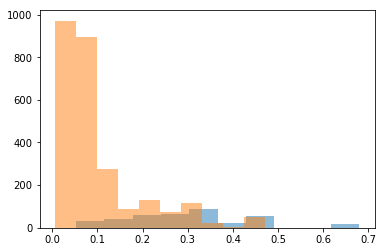

3 lpaprob_3 90 2912


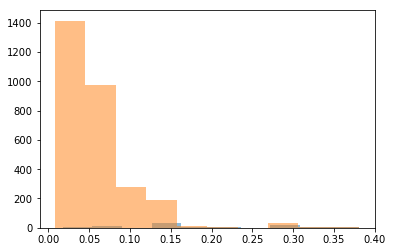

4 lpaprob_4 614 2388


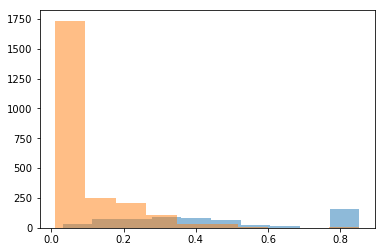

5 lpaprob_5 247 2755


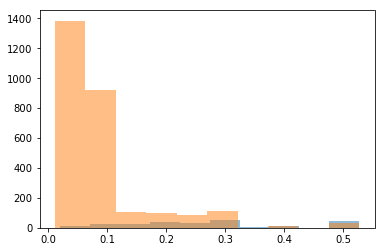

6 lpaprob_6 260 2742


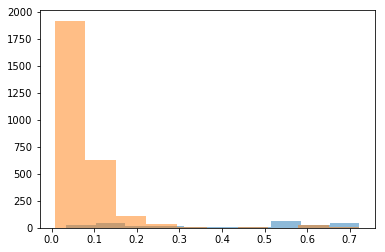

7 lpaprob_7 844 2158


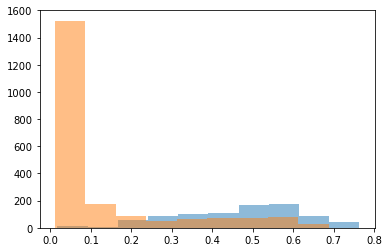

8 lpaprob_8 13 2989


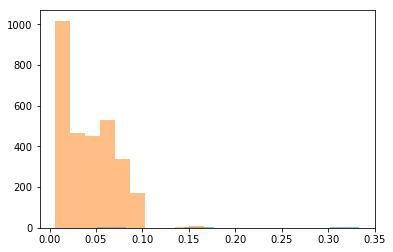

9 lpaprob_9 40 2962


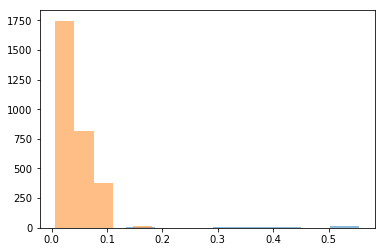

In [28]:
for i,col in enumerate(feats.columns):
    i=i+1
    s=feats[col].values
    a=s[feats_classes==i]
    b=s[~np.isnan(feats_classes) & (feats_classes!=i)]
    a=a[~np.isnan(a)]
    b=b[~np.isnan(b)]
    print i,col,len(a),len(b)
    #print a,b
    plt.hist(a,alpha=0.5);
    plt.hist(b,alpha=0.5);
    plt.show()
    #break